In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
del sys.path[0]
sys.path.insert(0, module_path)
    

In [2]:
sys.path

['/home/artem/Desktop/programming/baesian_optimization',
 '/home/artem/anaconda3/lib/python38.zip',
 '/home/artem/anaconda3/lib/python3.8',
 '/home/artem/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/artem/anaconda3/lib/python3.8/site-packages',
 '/home/artem/anaconda3/lib/python3.8/site-packages/deminf_data-0.0.0-py3.8.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/moments-1.0.9-py3.8-linux-x86_64.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/GPyOpt-1.2.6-py3.8.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/gadma-2.0.0rc11.dev6-py3.8.egg',
 '/home/artem/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/artem/.ipython']

# Model's Comparison

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from models.Bayesian_Optimization import BayesianOptimization
from models.Genetic_Algorithm import GeneticAlgorithm
from tqdm.notebook import tqdm
import numpy as np
from scipy.stats import bayes_mvs
import matplotlib.pyplot as plt
import pickle

In [5]:
BayesianOptimization_Y_best = []
GenericAlgorithm_Y_best = []

In [6]:
num_run = 5
num_evaluation = 200

In [7]:
progress_bar_BayesianOptimization = tqdm(total=num_evaluation * num_run, desc='BayesianOptimization')
progress_bar_GeneticAlgorithm = tqdm(total=num_evaluation * num_run, desc='GeneticAlgorithm')

In [8]:
for i in range(num_run):
    model = GeneticAlgorithm(num_evaluation, progress_bar_GeneticAlgorithm)
    _, Y_best = model.fit()
    GenericAlgorithm_Y_best.append(Y_best)

In [9]:
for i in range(num_run):
    model = BayesianOptimization(num_evaluation, progress_bar_BayesianOptimization)
    _, Y_best = model.fit()
    BayesianOptimization_Y_best.append(Y_best[:num_evaluation])

In [10]:
with open("data/compare_list_GeneticAlgoritm_saved.txt", "wb") as fp:
    pickle.dump(GenericAlgorithm_Y_best, fp)
with open("data/compare_list_BayesianOptimization_saved.txt", 'wb') as fp:
    pickle.dump(BayesianOptimization_Y_best, fp)

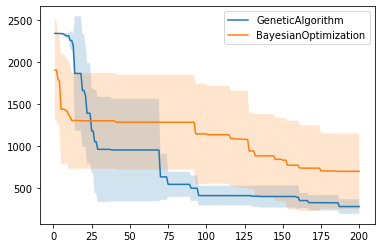

In [11]:
GenericAlgorithm_Y_best = np.array(GenericAlgorithm_Y_best)
BayesianOptimization_Y_best = np.array(BayesianOptimization_Y_best)



GenericAlgorithm_Y_best_mean = np.mean(GenericAlgorithm_Y_best, axis=0)
BayesianOptimization_Y_best_mean = np.mean(BayesianOptimization_Y_best, axis=0)

GenericAlgorithm_Y_best_range_low = []
GenericAlgorithm_Y_best_range_high = []
for i in range(num_evaluation):
    mean, _, _ = bayes_mvs(GenericAlgorithm_Y_best[:, i].flatten())
    GenericAlgorithm_Y_best_range_low.append(mean.minmax[0])
    GenericAlgorithm_Y_best_range_high.append(mean.minmax[1])
                                              
BayesianOptimization_Y_best_range_low = []
BayesianOptimization_Y_best_range_high = []
for i in range(num_evaluation):
    mean, _, _ = bayes_mvs(BayesianOptimization_Y_best[:, i].flatten())
    BayesianOptimization_Y_best_range_low.append(mean.minmax[0])
    BayesianOptimization_Y_best_range_high.append(mean.minmax[1])

plt.plot(range(1, num_evaluation + 1), GenericAlgorithm_Y_best_mean, label='GeneticAlgorithm')
plt.fill_between(range(1, num_evaluation + 1),
                 GenericAlgorithm_Y_best_range_low, GenericAlgorithm_Y_best_range_high, alpha=0.2)
plt.plot(range(1, num_evaluation + 1), BayesianOptimization_Y_best_mean, label='BayesianOptimization')
plt.fill_between(range(1, num_evaluation + 1), 
                 BayesianOptimization_Y_best_range_low, BayesianOptimization_Y_best_range_high, alpha=0.2)
plt.legend()

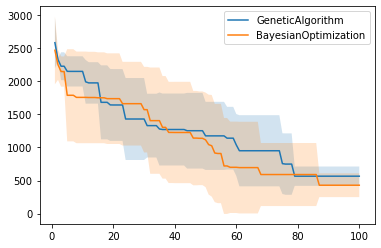

In [16]:
GenericAlgorithm_Y_best = np.array(GenericAlgorithm_Y_best)
BayesianOptimization_Y_best = np.array(BayesianOptimization_Y_best)



GenericAlgorithm_Y_best_mean = np.mean(GenericAlgorithm_Y_best, axis=0)
BayesianOptimization_Y_best_mean = np.mean(BayesianOptimization_Y_best, axis=0)

GenericAlgorithm_Y_best_range_low = []
GenericAlgorithm_Y_best_range_high = []
for i in range(num_evaluation):
    mean, _, _ = bayes_mvs(GenericAlgorithm_Y_best[:, i].flatten())
    GenericAlgorithm_Y_best_range_low.append(mean.minmax[0])
    GenericAlgorithm_Y_best_range_high.append(mean.minmax[1])
                                              
BayesianOptimization_Y_best_range_low = []
BayesianOptimization_Y_best_range_high = []
for i in range(num_evaluation):
    mean, _, _ = bayes_mvs(BayesianOptimization_Y_best[:, i].flatten())
    BayesianOptimization_Y_best_range_low.append(mean.minmax[0])
    BayesianOptimization_Y_best_range_high.append(mean.minmax[1])

plt.plot(range(1, num_evaluation + 1), GenericAlgorithm_Y_best_mean, label='GeneticAlgorithm')
plt.fill_between(range(1, num_evaluation + 1),
                 GenericAlgorithm_Y_best_range_low, GenericAlgorithm_Y_best_range_high, alpha=0.2)
plt.plot(range(1, num_evaluation + 1), BayesianOptimization_Y_best_mean, label='BayesianOptimization')
plt.fill_between(range(1, num_evaluation + 1), 
                 BayesianOptimization_Y_best_range_low, BayesianOptimization_Y_best_range_high, alpha=0.2)
plt.legend()